In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation
from tensorflow.python.keras import metrics
from sklearn.preprocessing import StandardScaler
from tensorflow.python import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from keras.layers import LSTM, Flatten
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk
import keras.backend as K
import sys
from tensorflow.python.client import device_lib

In [2]:
df=pd.read_excel('Continous_2weeks_2day_1term.xlsx')

X = df.iloc[:,[1,3,4,5,6,7]]
y = df.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7217295447147532665
xla_global_id: -1
]


In [3]:
#결과 넣을 배열
Result = [[0 for j in range(4)] for i in range(10)]
CMResult = [[[0 for k in range(3)]for j in range(3)] for i in range(10)]
pred_list = []
LossResult = [[0 for j in range(100)] for i in range(10)]
AccuracyResult = [[0 for j in range(100)] for i in range(10)]


In [4]:
#한 사람당 데이터 수
Count_1 = int(181*0.1)
#한 사람당 데이터 수
Count_2 = 181

In [5]:
X_test = pd.DataFrame()
X_train = pd.DataFrame()
y_test = pd.DataFrame()
y_train = pd.DataFrame()
empty = pd.DataFrame()

#결과 넣을 배열
Result = [[0 for j in range(4)] for i in range(10)]

In [6]:
K.clear_session()
model = Sequential()
#input_shpae(time_step, daata_dim)
model.add(LSTM(32,  input_shape=(6,6), return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 34s 4ms/step - loss: 0.9867 - accuracy: 0.4823 - val_loss: 1.0633 - val_accuracy: 0.4207
Epoch 2/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.8789 - accuracy: 0.5659 - val_loss: 1.1574 - val_accuracy: 0.4718
Epoch 3/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.7177 - accuracy: 0.6732 - val_loss: 1.3069 - val_accuracy: 0.4718
Epoch 4/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.5940 - accuracy: 0.7458 - val_loss: 1.4927 - val_accuracy: 0.4706
Epoch 5/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.5142 - accuracy: 0.7888 - val_loss: 1.5432 - val_accuracy: 0.4829
Epoch 6/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.4590 - accuracy: 0.8165 - val_loss: 1.7215 - val_accuracy: 0.4805
Epoch 7/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.4202 - accuracy: 0.8339 - val_lo

Epoch 57/100
8320/8320 [==============================] - 30s 4ms/step - loss: 0.1713 - accuracy: 0.9335 - val_loss: 3.4659 - val_accuracy: 0.4634
Epoch 60/100
8320/8320 [==============================] - 30s 4ms/step - loss: 0.1715 - accuracy: 0.9342 - val_loss: 3.4635 - val_accuracy: 0.4630
Epoch 61/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1703 - accuracy: 0.9341 - val_loss: 3.3956 - val_accuracy: 0.4709
Epoch 62/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1689 - accuracy: 0.9349 - val_loss: 3.5013 - val_accuracy: 0.4583
Epoch 63/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1683 - accuracy: 0.9356 - val_loss: 3.6415 - val_accuracy: 0.4551
Epoch 64/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1664 - accuracy: 0.9356 - val_loss: 3.4970 - val_accuracy: 0.4522
Epoch 65/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1671 - accuracy: 0.9358 - val_loss: 3

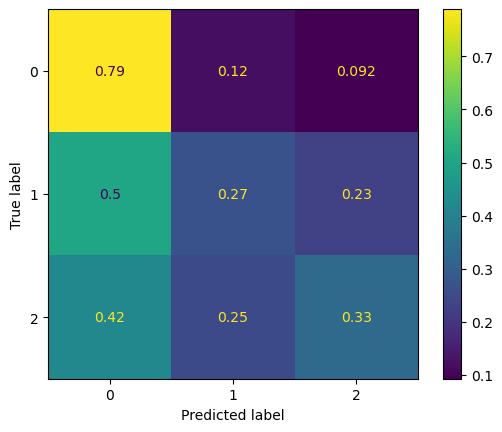

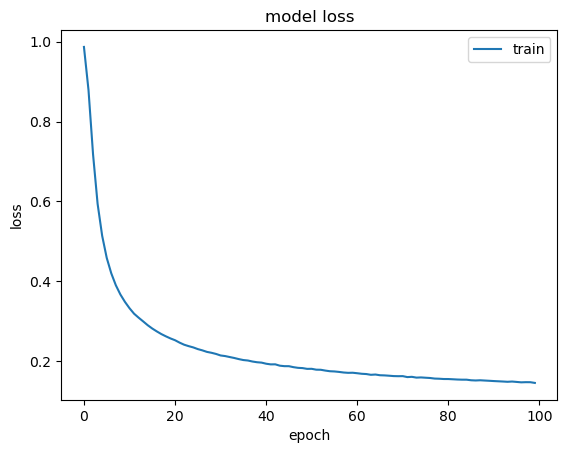

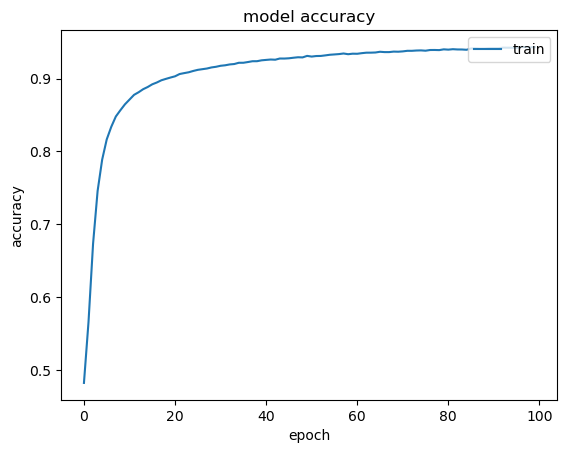

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1474 - accuracy: 0.9431 - val_loss: 0.5910 - val_accuracy: 0.8636
Epoch 2/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1460 - accuracy: 0.9440 - val_loss: 0.6176 - val_accuracy: 0.8588
Epoch 3/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1452 - accuracy: 0.9436 - val_loss: 0.6273 - val_accuracy: 0.8594
Epoch 4/100
8320/8320 [==============================] - 30s 4ms/step - loss: 0.1451 - accuracy: 0.9438 - val_loss: 0.6369 - val_accuracy: 0.8576
Epoch 5/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1448 - accuracy: 0.9440 - val_loss: 0.6156 - val_accuracy: 0.8581
Epoch 6/100
8320/8320 [==============================] - 30s 4ms/step - loss: 0.1444 - accuracy: 0.9444 - val_loss: 0.6052 - val_accuracy: 0.8586
Epoch 7/100
8320/8320 [==============================] - 30s 4ms/step - loss: 0.1439 - accuracy: 0.9445 - val_lo

Epoch 57/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1291 - accuracy: 0.9499 - val_loss: 0.6398 - val_accuracy: 0.8661
Epoch 58/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1281 - accuracy: 0.9506 - val_loss: 0.6697 - val_accuracy: 0.8558
Epoch 59/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1292 - accuracy: 0.9495 - val_loss: 0.6801 - val_accuracy: 0.8554
Epoch 60/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1298 - accuracy: 0.9498 - val_loss: 0.7077 - val_accuracy: 0.8444
Epoch 61/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1304 - accuracy: 0.9498 - val_loss: 0.6375 - val_accuracy: 0.8646
Epoch 62/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1291 - accuracy: 0.9499 - val_loss: 0.6375 - val_accuracy: 0.8654
Epoch 63/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1301 - accuracy: 0.9497 - val_loss: 0

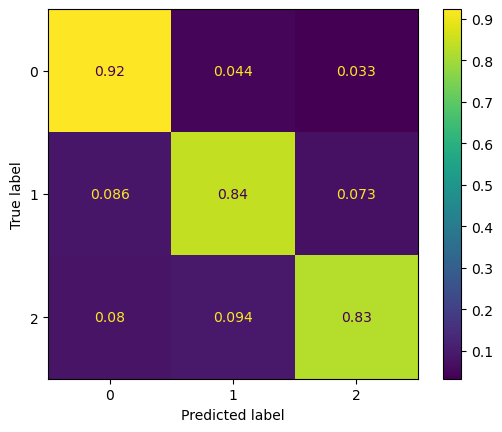

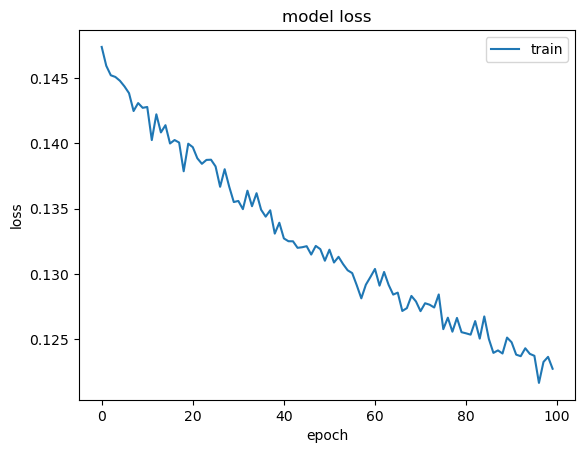

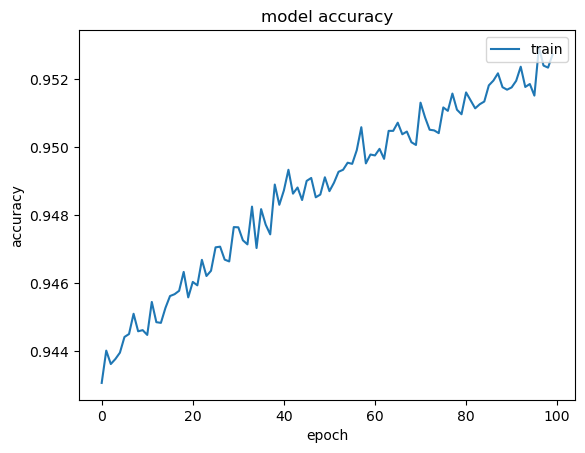

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1220 - accuracy: 0.9522 - val_loss: 0.8429 - val_accuracy: 0.8440
Epoch 2/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1227 - accuracy: 0.9522 - val_loss: 0.8198 - val_accuracy: 0.8401
Epoch 3/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1232 - accuracy: 0.9523 - val_loss: 0.8597 - val_accuracy: 0.8356
Epoch 4/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1219 - accuracy: 0.9523 - val_loss: 0.7913 - val_accuracy: 0.8456
Epoch 5/100
8320/8320 [==============================] - 33s 4ms/step - loss: 0.1224 - accuracy: 0.9525 - val_loss: 0.8005 - val_accuracy: 0.8453
Epoch 6/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1218 - accuracy: 0.9531 - val_loss: 0.8162 - val_accuracy: 0.8450
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1222 - accuracy: 0.9525 - val_lo

Epoch 57/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1139 - accuracy: 0.9553 - val_loss: 0.8158 - val_accuracy: 0.8425
Epoch 58/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1156 - accuracy: 0.9551 - val_loss: 0.8148 - val_accuracy: 0.8439
Epoch 59/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1169 - accuracy: 0.9544 - val_loss: 0.8336 - val_accuracy: 0.8454
Epoch 60/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1168 - accuracy: 0.9547 - val_loss: 0.8364 - val_accuracy: 0.8422
Epoch 61/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1160 - accuracy: 0.9555 - val_loss: 0.8336 - val_accuracy: 0.8481
Epoch 62/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1151 - accuracy: 0.9548 - val_loss: 0.8404 - val_accuracy: 0.8430
Epoch 63/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1158 - accuracy: 0.9548 - val_loss: 0

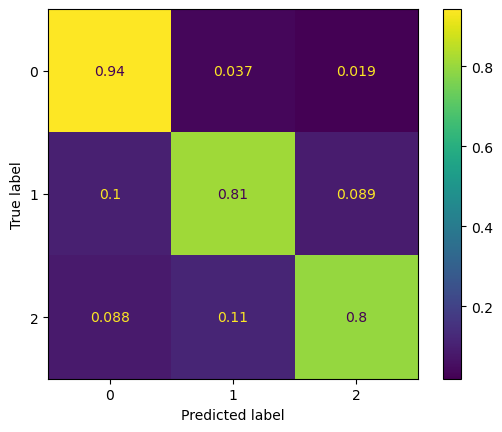

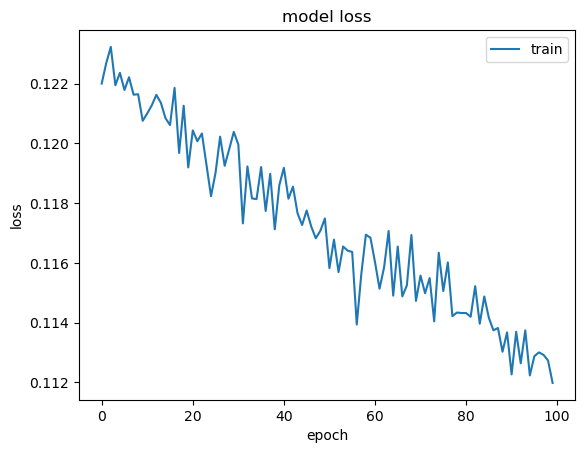

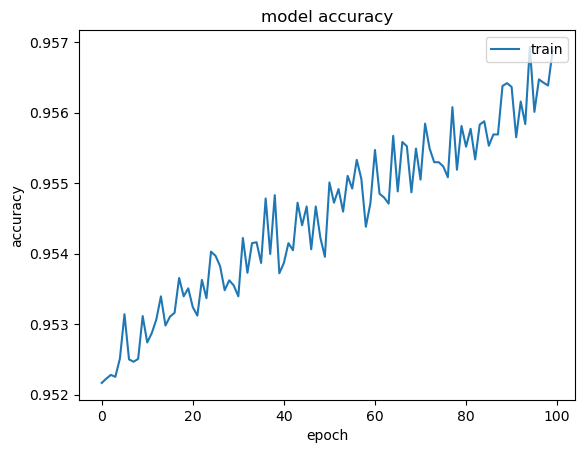

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1132 - accuracy: 0.9564 - val_loss: 0.9806 - val_accuracy: 0.8310
Epoch 2/100
8320/8320 [==============================] - 33s 4ms/step - loss: 0.1120 - accuracy: 0.9566 - val_loss: 0.9893 - val_accuracy: 0.8288
Epoch 3/100
8320/8320 [==============================] - 33s 4ms/step - loss: 0.1132 - accuracy: 0.9559 - val_loss: 0.9388 - val_accuracy: 0.8278
Epoch 4/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1128 - accuracy: 0.9563 - val_loss: 0.9769 - val_accuracy: 0.8330
Epoch 5/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1132 - accuracy: 0.9566 - val_loss: 0.9695 - val_accuracy: 0.8265
Epoch 6/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1117 - accuracy: 0.9570 - val_loss: 0.9702 - val_accuracy: 0.8286
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1123 - accuracy: 0.9564 - val_lo

Epoch 57/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1080 - accuracy: 0.9578 - val_loss: 0.9928 - val_accuracy: 0.8312
Epoch 58/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1081 - accuracy: 0.9582 - val_loss: 1.0152 - val_accuracy: 0.8280
Epoch 59/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1083 - accuracy: 0.9577 - val_loss: 1.0119 - val_accuracy: 0.8297
Epoch 60/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1079 - accuracy: 0.9581 - val_loss: 0.9945 - val_accuracy: 0.8285
Epoch 61/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1088 - accuracy: 0.9581 - val_loss: 0.9974 - val_accuracy: 0.8308
Epoch 62/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1096 - accuracy: 0.9578 - val_loss: 0.9630 - val_accuracy: 0.8317
Epoch 63/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1083 - accuracy: 0.9578 - val_loss: 1

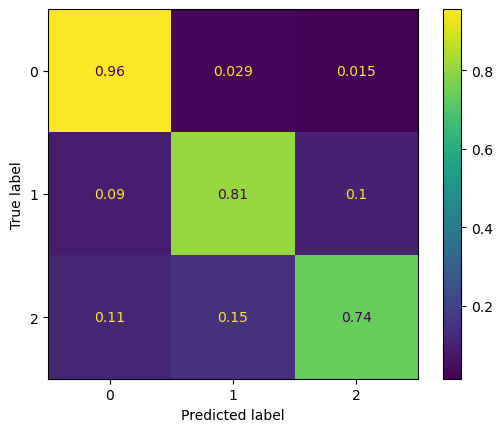

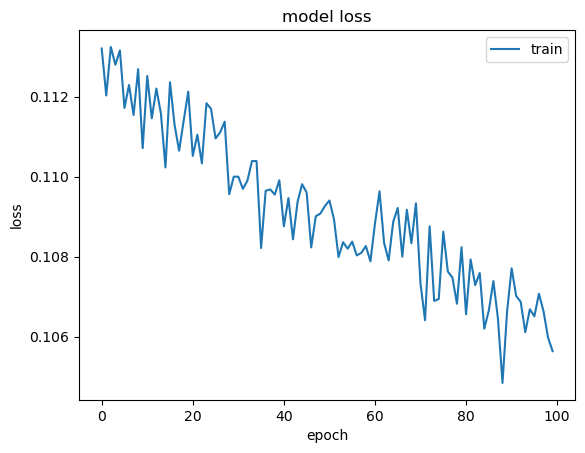

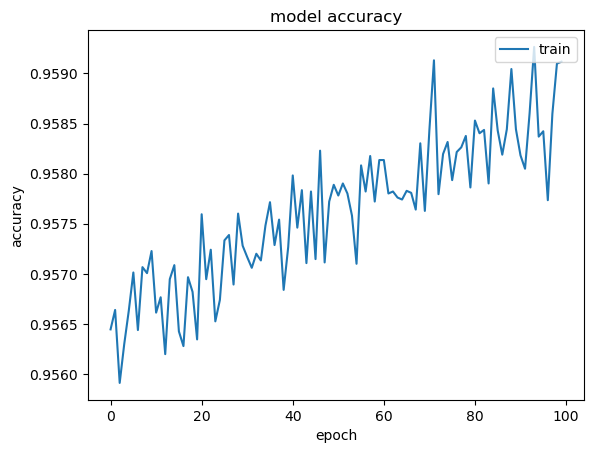

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1059 - accuracy: 0.9586 - val_loss: 0.8182 - val_accuracy: 0.8390
Epoch 2/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1066 - accuracy: 0.9588 - val_loss: 0.8235 - val_accuracy: 0.8510
Epoch 3/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1064 - accuracy: 0.9586 - val_loss: 0.8120 - val_accuracy: 0.8509
Epoch 4/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1057 - accuracy: 0.9588 - val_loss: 0.7864 - val_accuracy: 0.8600
Epoch 5/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1064 - accuracy: 0.9588 - val_loss: 0.8099 - val_accuracy: 0.8555
Epoch 6/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1061 - accuracy: 0.9589 - val_loss: 0.8357 - val_accuracy: 0.8509
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1059 - accuracy: 0.9589 - val_lo

Epoch 57/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1028 - accuracy: 0.9600 - val_loss: 0.8081 - val_accuracy: 0.8586
Epoch 58/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1031 - accuracy: 0.9602 - val_loss: 0.7823 - val_accuracy: 0.8632
Epoch 59/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1037 - accuracy: 0.9596 - val_loss: 0.8250 - val_accuracy: 0.8475
Epoch 60/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1024 - accuracy: 0.9602 - val_loss: 0.8255 - val_accuracy: 0.8476
Epoch 61/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1026 - accuracy: 0.9602 - val_loss: 0.8183 - val_accuracy: 0.8562
Epoch 62/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1031 - accuracy: 0.9604 - val_loss: 0.8109 - val_accuracy: 0.8553
Epoch 63/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1040 - accuracy: 0.9601 - val_loss: 0

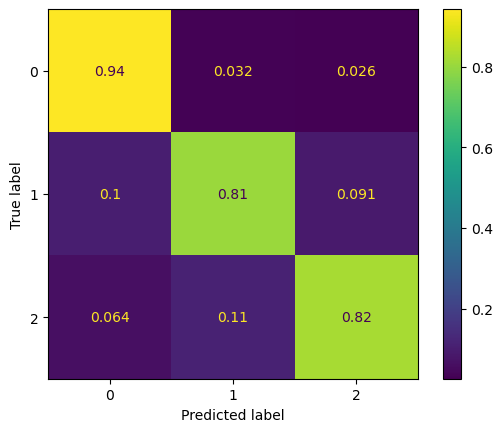

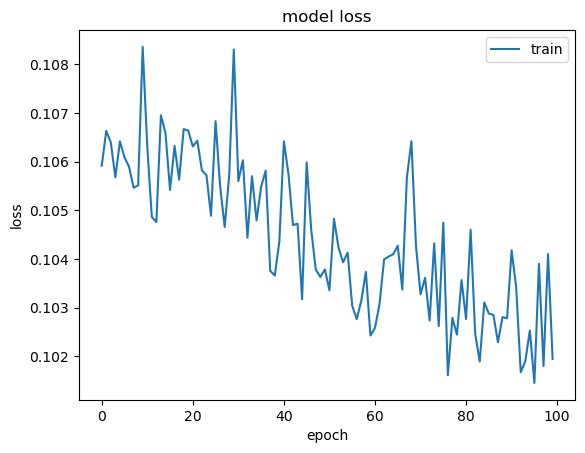

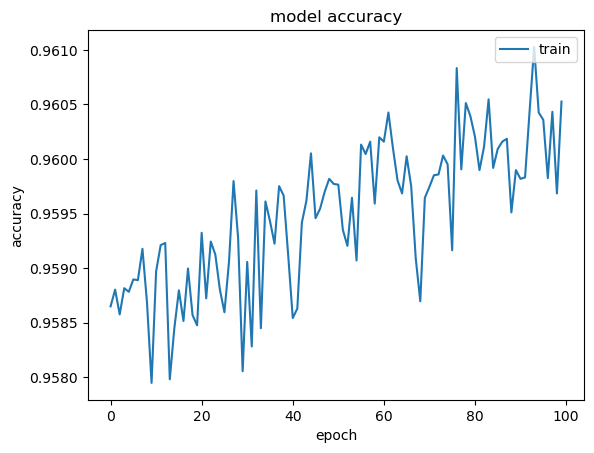

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1032 - accuracy: 0.9601 - val_loss: 1.3803 - val_accuracy: 0.7848
Epoch 2/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1034 - accuracy: 0.9604 - val_loss: 1.3561 - val_accuracy: 0.7834
Epoch 3/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1031 - accuracy: 0.9598 - val_loss: 1.3432 - val_accuracy: 0.8026
Epoch 4/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1024 - accuracy: 0.9605 - val_loss: 1.3357 - val_accuracy: 0.7934
Epoch 5/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1013 - accuracy: 0.9605 - val_loss: 1.3508 - val_accuracy: 0.7932
Epoch 6/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1019 - accuracy: 0.9602 - val_loss: 1.3282 - val_accuracy: 0.7865
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1019 - accuracy: 0.9602 - val_lo

Epoch 57/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1009 - accuracy: 0.9612 - val_loss: 1.3385 - val_accuracy: 0.8014
Epoch 58/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1005 - accuracy: 0.9611 - val_loss: 1.4198 - val_accuracy: 0.7856
Epoch 59/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.1012 - accuracy: 0.9601 - val_loss: 1.3825 - val_accuracy: 0.7861
Epoch 60/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1005 - accuracy: 0.9613 - val_loss: 1.3936 - val_accuracy: 0.7883
Epoch 61/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1008 - accuracy: 0.9611 - val_loss: 1.3549 - val_accuracy: 0.7972
Epoch 62/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1007 - accuracy: 0.9610 - val_loss: 1.3534 - val_accuracy: 0.8055
Epoch 63/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1010 - accuracy: 0.9607 - val_loss: 1

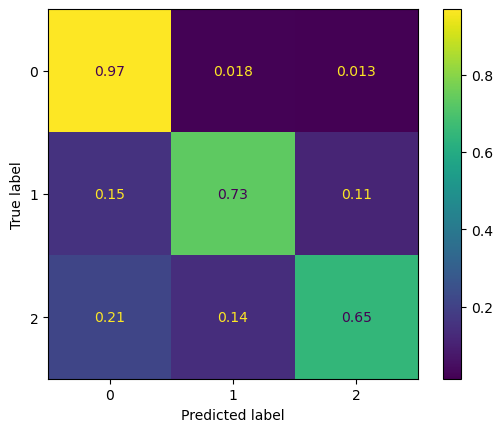

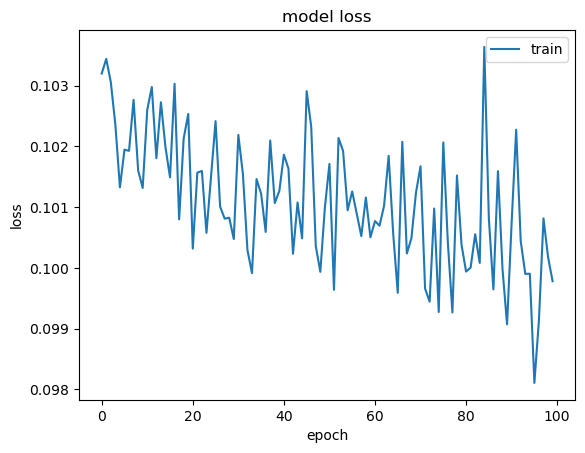

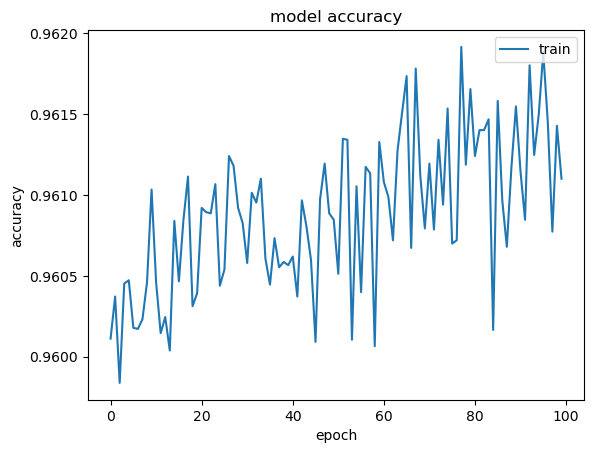

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1012 - accuracy: 0.9606 - val_loss: 1.0939 - val_accuracy: 0.8170
Epoch 2/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0996 - accuracy: 0.9610 - val_loss: 1.0828 - val_accuracy: 0.8130
Epoch 3/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0979 - accuracy: 0.9619 - val_loss: 1.1071 - val_accuracy: 0.8099
Epoch 4/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0983 - accuracy: 0.9621 - val_loss: 1.0736 - val_accuracy: 0.8254
Epoch 5/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0999 - accuracy: 0.9615 - val_loss: 1.0880 - val_accuracy: 0.8258
Epoch 6/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1013 - accuracy: 0.9607 - val_loss: 1.0961 - val_accuracy: 0.8236
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1019 - accuracy: 0.9613 - val_lo

Epoch 57/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0992 - accuracy: 0.9620 - val_loss: 1.1216 - val_accuracy: 0.8142
Epoch 58/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0984 - accuracy: 0.9621 - val_loss: 1.0757 - val_accuracy: 0.8242
Epoch 59/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0984 - accuracy: 0.9623 - val_loss: 1.0913 - val_accuracy: 0.8110
Epoch 60/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1000 - accuracy: 0.9614 - val_loss: 1.0689 - val_accuracy: 0.8285
Epoch 61/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0994 - accuracy: 0.9620 - val_loss: 1.0692 - val_accuracy: 0.8133
Epoch 62/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.1000 - accuracy: 0.9617 - val_loss: 1.0777 - val_accuracy: 0.8287
Epoch 63/100
8320/8320 [==============================] - 33s 4ms/step - loss: 0.0976 - accuracy: 0.9629 - val_loss: 1

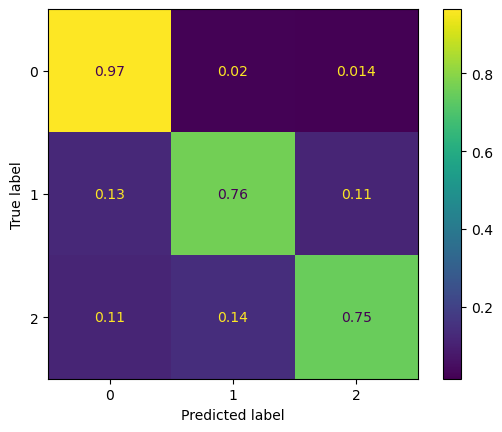

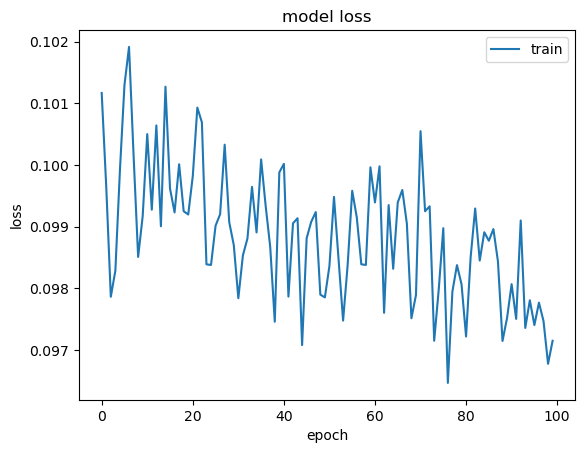

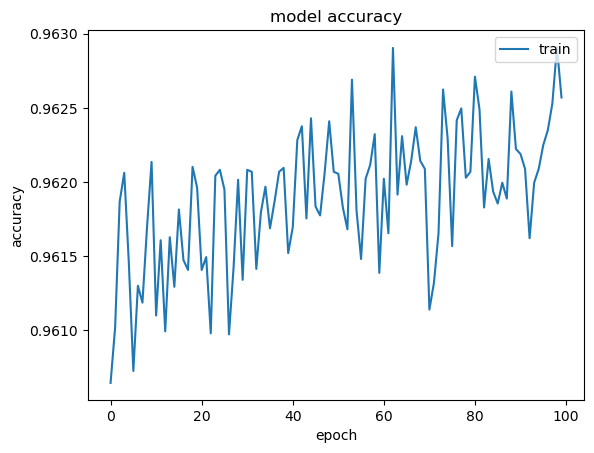

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0982 - accuracy: 0.9619 - val_loss: 1.3545 - val_accuracy: 0.8003
Epoch 2/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0990 - accuracy: 0.9624 - val_loss: 1.3305 - val_accuracy: 0.7983
Epoch 3/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0975 - accuracy: 0.9621 - val_loss: 1.3021 - val_accuracy: 0.8060
Epoch 4/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0988 - accuracy: 0.9621 - val_loss: 1.2964 - val_accuracy: 0.8080
Epoch 5/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0975 - accuracy: 0.9623 - val_loss: 1.2742 - val_accuracy: 0.8141
Epoch 6/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0972 - accuracy: 0.9623 - val_loss: 1.2562 - val_accuracy: 0.8172
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0963 - accuracy: 0.9632 - val_lo

Epoch 57/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0985 - accuracy: 0.9620 - val_loss: 1.3247 - val_accuracy: 0.8048
Epoch 58/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0973 - accuracy: 0.9621 - val_loss: 1.3541 - val_accuracy: 0.8035
Epoch 59/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0970 - accuracy: 0.9625 - val_loss: 1.3576 - val_accuracy: 0.8058
Epoch 60/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0971 - accuracy: 0.9626 - val_loss: 1.3259 - val_accuracy: 0.8053
Epoch 61/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0971 - accuracy: 0.9627 - val_loss: 1.3187 - val_accuracy: 0.8097
Epoch 62/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0972 - accuracy: 0.9622 - val_loss: 1.3703 - val_accuracy: 0.7949
Epoch 63/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0961 - accuracy: 0.9627 - val_loss: 1

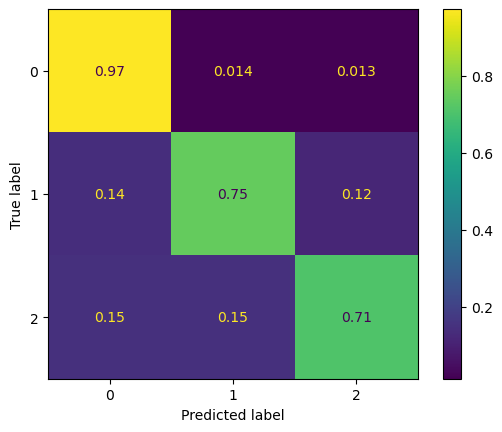

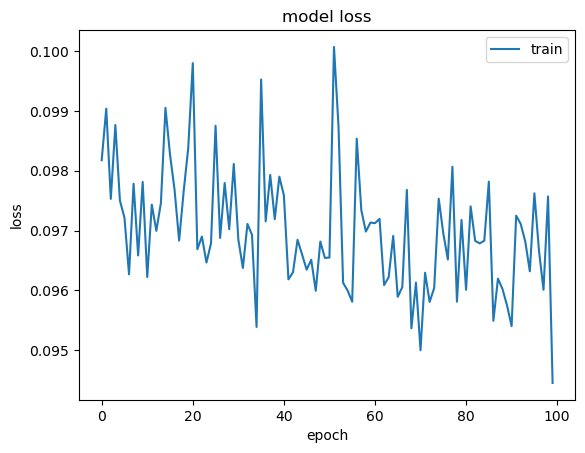

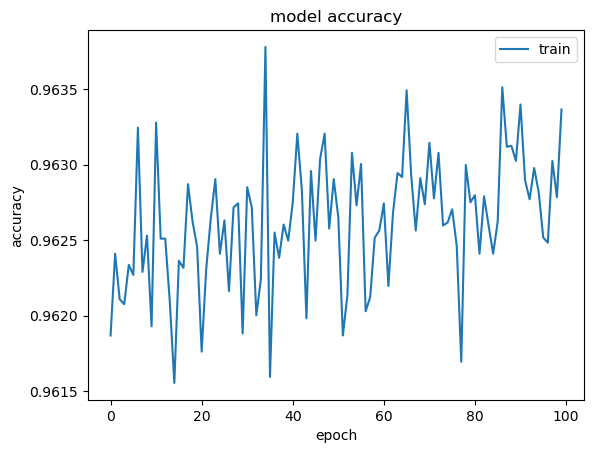

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0971 - accuracy: 0.9627 - val_loss: 1.0496 - val_accuracy: 0.8300
Epoch 2/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0958 - accuracy: 0.9633 - val_loss: 1.0897 - val_accuracy: 0.8228
Epoch 3/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0956 - accuracy: 0.9630 - val_loss: 1.0494 - val_accuracy: 0.8384
Epoch 4/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0965 - accuracy: 0.9631 - val_loss: 1.0859 - val_accuracy: 0.8362
Epoch 5/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0961 - accuracy: 0.9628 - val_loss: 1.0631 - val_accuracy: 0.8318
Epoch 6/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0971 - accuracy: 0.9626 - val_loss: 1.0719 - val_accuracy: 0.8330
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0960 - accuracy: 0.9630 - val_lo

Epoch 57/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0962 - accuracy: 0.9628 - val_loss: 1.0918 - val_accuracy: 0.8293
Epoch 58/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0958 - accuracy: 0.9632 - val_loss: 1.0658 - val_accuracy: 0.8257
Epoch 59/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0954 - accuracy: 0.9637 - val_loss: 1.0849 - val_accuracy: 0.8332
Epoch 60/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0949 - accuracy: 0.9633 - val_loss: 1.1157 - val_accuracy: 0.8413
Epoch 61/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0954 - accuracy: 0.9630 - val_loss: 1.0858 - val_accuracy: 0.8385
Epoch 62/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0958 - accuracy: 0.9636 - val_loss: 1.0713 - val_accuracy: 0.8259
Epoch 63/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.0959 - accuracy: 0.9634 - val_loss: 1

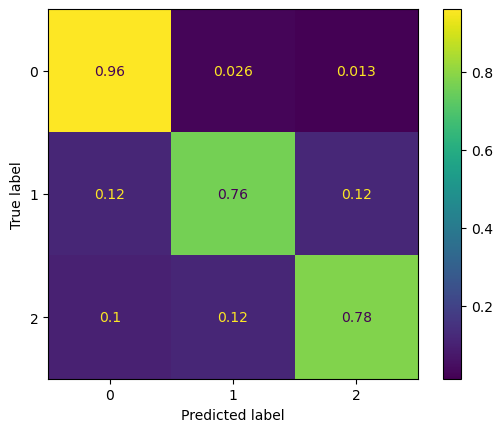

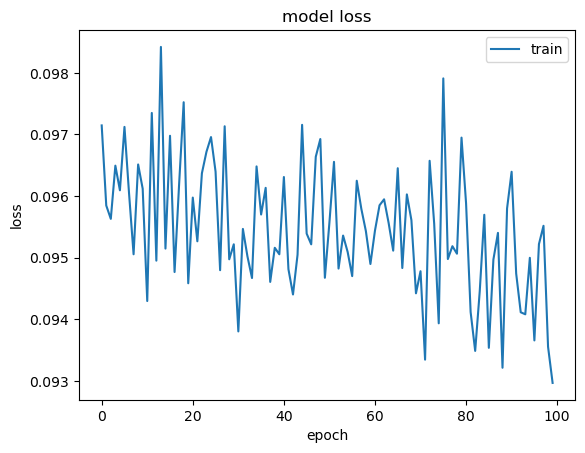

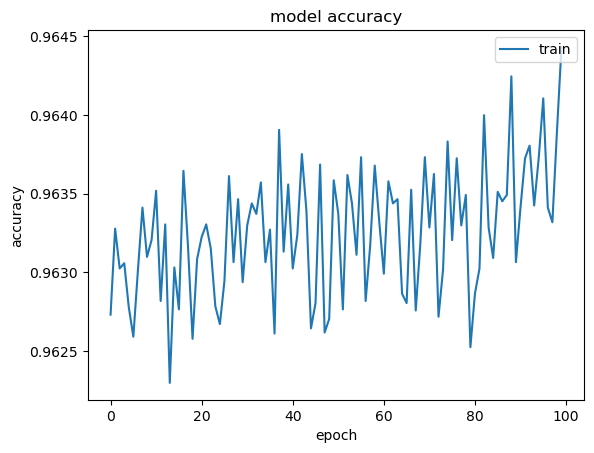

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0957 - accuracy: 0.9636 - val_loss: 1.3086 - val_accuracy: 0.8307
Epoch 2/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0939 - accuracy: 0.9639 - val_loss: 1.4053 - val_accuracy: 0.8272
Epoch 3/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0932 - accuracy: 0.9646 - val_loss: 1.4083 - val_accuracy: 0.8162
Epoch 4/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0938 - accuracy: 0.9641 - val_loss: 1.3486 - val_accuracy: 0.8278
Epoch 5/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0959 - accuracy: 0.9631 - val_loss: 1.3569 - val_accuracy: 0.8263
Epoch 6/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0945 - accuracy: 0.9636 - val_loss: 1.3296 - val_accuracy: 0.8274
Epoch 7/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0945 - accuracy: 0.9635 - val_lo

Epoch 57/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0923 - accuracy: 0.9643 - val_loss: 1.3758 - val_accuracy: 0.8235
Epoch 58/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0955 - accuracy: 0.9635 - val_loss: 1.4022 - val_accuracy: 0.8219
Epoch 59/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0959 - accuracy: 0.9631 - val_loss: 1.4048 - val_accuracy: 0.8243
Epoch 60/100
8320/8320 [==============================] - 33s 4ms/step - loss: 0.0928 - accuracy: 0.9638 - val_loss: 1.3771 - val_accuracy: 0.8237
Epoch 61/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0942 - accuracy: 0.9640 - val_loss: 1.3175 - val_accuracy: 0.8378
Epoch 62/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0954 - accuracy: 0.9634 - val_loss: 1.3636 - val_accuracy: 0.8182
Epoch 63/100
8320/8320 [==============================] - 32s 4ms/step - loss: 0.0953 - accuracy: 0.9638 - val_loss: 1

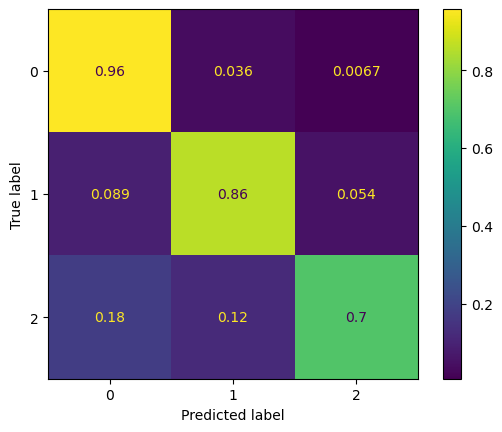

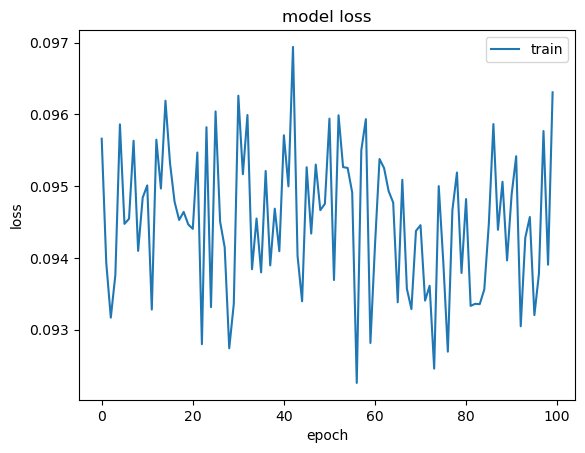

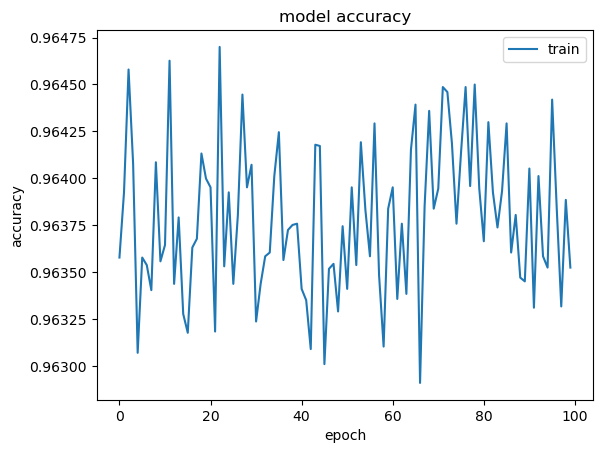

In [7]:
for i in range(10):
    X_test = empty
    X_train = empty
    y_test = empty
    y_train = empty
    y_test_list = []

    for j in range(322):
        X_temp_test = X.iloc[Count_2 * j + Count_1 * i:Count_2 * j + Count_1 * (i + 1)]
        X_test = pd.concat([X_test, X_temp_test])
        X_temp_train = X.iloc[Count_2 * j + Count_1:Count_2 * (j + 1)]
        X_train = pd.concat([X_train, X_temp_train])

        y_temp_test = y.iloc[Count_2 * j + Count_1 * i:Count_2 * j + Count_1 * (i + 1)]
        y_test = pd.concat([y_test, y_temp_test])
        y_temp_train = y.iloc[Count_2 * j + Count_1:Count_2 * (j + 1)]
        y_train = pd.concat([y_train, y_temp_train])

    #     print('SMOTE 적용 전 Train 레이블 값 분포: \n', y_train.value_counts())
    #     print('SMOTE 적용 전 Test 레이블 값 분포: \n', y_test.value_counts())

    # SMOTE 적용
    smote = SMOTE(random_state=0)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    X_test, y_test = smote.fit_resample(X_test, y_test)
    #     print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_test.shape, y_test.shape)
    #     print('SMOTE 적용 후 Train 레이블 값 분포: \n', y_train.value_counts())
    #     print('SMOTE 적용 후 Test 레이블 값 분포: \n', y_test.value_counts())

    # 원핫인코딩
    # 예시 : 1 , 2 -> (1,0) , (0,1)
    X_train = X_train.values
    X_test = X_test.values
    # y_train = y_train.values
    # y_test = y_test.values

    X_train = X_train.reshape(X_train.shape[0], 6, 1)
    X_test = X_test.reshape(X_test.shape[0], 6, 1)

    # 원핫인코딩
    # 예시 : 1 , 2 -> (1,0) , (0,1)

    print(y_train.shape)
    # y_train = pd.get_dummies(y_train)
    # y_test = pd.get_dummies(y_test)

    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)

    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=18)
    model.summary()
    predicted = model.predict(X_test)
    results = model.evaluate(X_test, y_test, batch_size=18)
    print("[{}]Accuracy : {}".format
          
          (i, results[1]))


    predicted = pd.DataFrame(predicted)
    y_test = pd.DataFrame(y_test)
    predicted = predicted.idxmax(axis=1)
    y_test = y_test.idxmax(axis=1)

    #     print("predicted",predicted)
    #     print("y_test",y_test)

    # f1score
    f1 = f1_score(y_test, predicted, average='weighted')
    print("[{}]F1score : {}".format(i, f1))
    # precision/recall
    p_rlist = sk(y_test, predicted, average='weighted')
    print("[{}]Precision : {}".format(i, p_rlist[0]))
    print("[{}]Recall : {}".format(i, p_rlist[1]))
    print()
    # 결과 배열에 넣기
    Result[i][0] = results[1]
    Result[i][1] = f1
    Result[i][2] = p_rlist[0]
    Result[i][3] = p_rlist[1]
    del results
    del f1
    del p_rlist

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_test, predicted, labels=[0, 1, 2], normalize="true")
    CMResult[i] = cm
    print(CMResult[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot()
    filename = ("ConfusionMatrix_" + str(i))
    plt.savefig(filename + ".png")
    plt.show()

    LossResult[i] = history.history['loss']
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("LossGraph_" + str(i))
    plt.savefig(filename + ".png")
    plt.show()

    AccuracyResult[i] = history.history['accuracy']
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("AccuracyGraph_" + str(i))\
    
    
    
    
    plt.savefig(filename + ".png")
    plt.show()

    del filename

In [8]:
Result_df=pd.DataFrame(Result, columns=['Accuracy','F1-Score','Precision','Recall'])
Result_df

print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))

Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy'] = Result_df['Accuracy']
A = [Result_df['Accuracy'].mean(), Result_df['F1-Score'].mean(), Result_df['Precision'].mean(), Result_df['Recall'].mean()]
A = pd.DataFrame(A, columns=['Accuracy'])
Matrix = pd.concat([Matrix,A])
Matrix = Matrix.transpose()
Matrix.to_excel('./PFMatrix_LSTM2.xlsx')

Average of Accuracy 0.7959396749734878
Average of F1-Score 0.7912689956455164
Average of Precision 0.7998333549528044
Average of Recall 0.7959396725858019


In [11]:
LossResult

[[0.9867324233055115,
  0.8789126873016357,
  0.7177183628082275,
  0.5940055251121521,
  0.5141838788986206,
  0.45899027585983276,
  0.4202477037906647,
  0.39044877886772156,
  0.367326021194458,
  0.34883809089660645,
  0.3330274224281311,
  0.3193015456199646,
  0.30934539437294006,
  0.30000734329223633,
  0.2904512584209442,
  0.282161682844162,
  0.27490949630737305,
  0.2682444155216217,
  0.2625715434551239,
  0.25737670063972473,
  0.2528902292251587,
  0.2468530386686325,
  0.24166230857372284,
  0.23806622624397278,
  0.23491382598876953,
  0.23071758449077606,
  0.22752812504768372,
  0.2237226516008377,
  0.22146545350551605,
  0.21857893466949463,
  0.21476878225803375,
  0.21324484050273895,
  0.21083378791809082,
  0.20847149193286896,
  0.20565813779830933,
  0.20329679548740387,
  0.20212647318840027,
  0.1995941698551178,
  0.19781509041786194,
  0.1968580037355423,
  0.19411414861679077,
  0.19244906306266785,
  0.19258105754852295,
  0.1892099529504776,
  0.18801

In [12]:
AverageLossResult=[0 for j in range(100)]
AverageAccuracyResult=[0 for j in range(100)]

for i in range(10):
    for j in range(100):
#         print(i,j)
        AverageLossResult[j]=AverageLossResult[j]+LossResult[i][j]
        AverageAccuracyResult[j]=AverageAccuracyResult[j]+AccuracyResult[i][j]
for k in range(100):
    AverageLossResult[k]=AverageLossResult[k]/10
    AverageAccuracyResult[k]=AverageAccuracyResult[k]/10

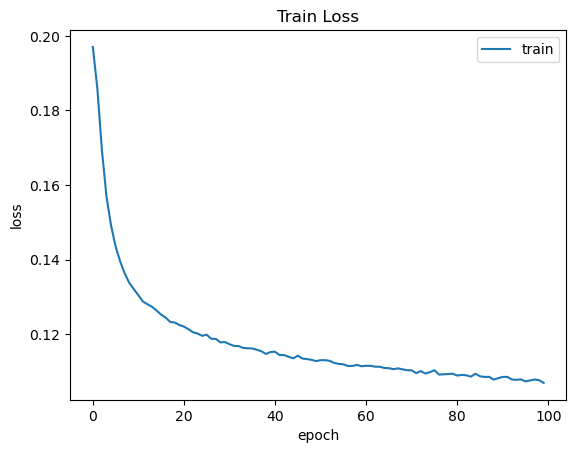

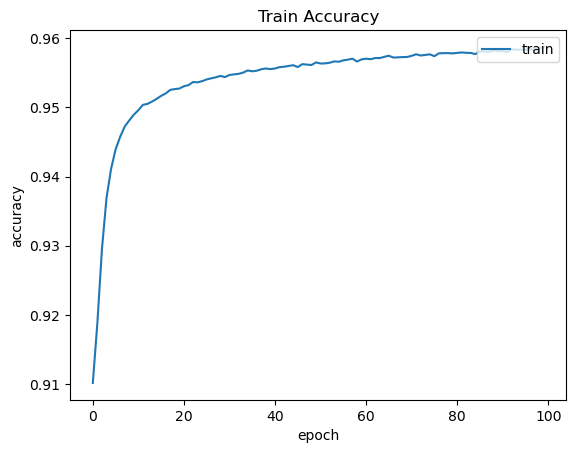

In [13]:
    plt.plot(AverageLossResult)
    plt.title('Train Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("LossGraph")
    plt.savefig(filename + ".png")
    plt.show()

    plt.plot(AverageAccuracyResult)
    plt.title('Train Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("AccuracyGraph")
    plt.savefig(filename + ".png")
    plt.show()

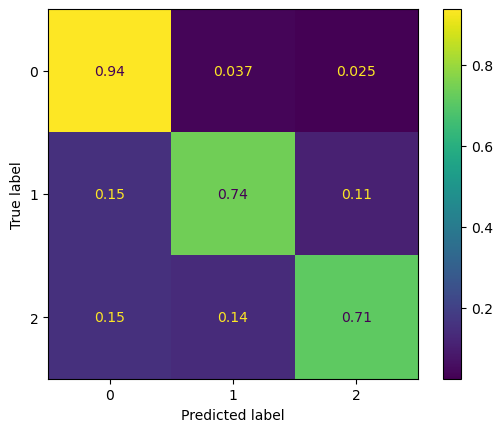

In [14]:
import numpy as np

AverageCM = [[0 for i in range(3)] for j in range(3)]

for i in range(10):
    for j in range(3):
        for k in range(3):
            AverageCM[j][k] = AverageCM[j][k] + CMResult[i][j][k]

for j in range(3):
    for k in range(3):
        AverageCM[j][k] = AverageCM[j][k] / 10

AverageCM = np.array(AverageCM)
disp = ConfusionMatrixDisplay(confusion_matrix=AverageCM, display_labels=[0, 1, 2])
disp.plot()
filename = ("LSTM_ConfusionMatrix")
plt.savefig(filename + ".png")
plt.show()